[2025-11-14 Fiddler](https://thefiddler.substack.com/p/can-you-irrigate-the-garden)
====================

Fiddler
-------
Let the center be at the origin, the first point be at $(1,0)$, and the
second point be at $(\cos\theta,\sin\theta)$, where $\theta$ is uniformly
distributed from $0$ to $2\pi$.  By symmetry, we can just consider $\theta$
from $0$ to $\pi$.

For a given $\theta$, the two points and the origin form an isosceles triangle,
so the relevant distance is $|\cos(\theta/2)|$, so, on average, the distance is
$2/\pi$ furlongs.

In [1]:
integral(cos(x/2), x, 0, pi)/pi

2/pi

Extra credit
------------
Let the center be at the origin, the first point be at $(\cos\theta,\sin\theta)$,
and the second point be at $(\cos\theta,-\sin\theta)$, where $\theta$ is uniformly
distributed from $0$ to $\pi$.  By symmetry, we can consider $\theta$ from $0$ to
$\pi/2$ and $y > 0$.

Let the second tree be at $(x,y)$ and let $D(\theta,x,y)$ be the distance from the
hose.  The average distance is then

$$ \frac4{\pi^2}\int_0^{\pi/2} d\theta \int_{-1}^1 dx \int_0^{\sqrt{1-x^2}} dy\,D(\theta,x,y) $$

When $y < \sin\theta$, the distance is $|x-\cos\theta|$.

When $y > \sin\theta$, the distance is the distance to the upper end of the hose,
$\sqrt{(x-\cos\theta)^2+(y-\sin\theta)^2}$, as the hose does not extend beyond the circle.
This corresponds to the regions outlined in red in the figure.

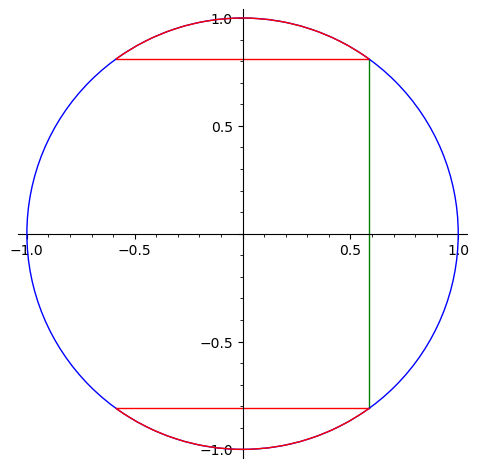

In [2]:
def fig(theta):
    x = cos(theta)
    y = sin(theta)
    return (circle((0,0),1,fill=false)
            + line([(x,y),(x,-y)],color='green')
            + line([(x,y),(-x,y)],color='red')
            + arc((0,0),1,sector=(theta,pi-theta),color='red')
            + line([(x,-y),(-x,-y)],color='red')
            + arc((0,0),1,sector=(pi+theta,2*pi-theta),color='red')
           )

fig(0.3*pi)

First, calculate the contribution from the region where $y < \sin\theta$ and
$x < \cos\theta$, left of the hose, which is the green segment in the figure.

$$ \frac{4}{\pi^2} \int_0^{\pi/2} d\theta \int_0^{\sin\theta} dy \int_{-\sqrt{1-y^2}}^{\cos\theta} dx\,(cos\theta-x) $$

In [3]:
x,y,theta = var("x,y,theta")
if False:
    # computer has problems with this integral
    d1 = 4/pi^2*integral(
        integral(
            integral(cos(theta)-x,
                     x, -sqrt(1-y^2), cos(theta)),
            y, 0, sin(theta)),
        theta, 0, pi/2)

d1a = 4/pi^2*integral(
    integral(
        integral(-x,
                 x, -sqrt(1-y^2), cos(theta)),
        y, 0, sin(theta)),
    theta, 0, pi/2)

if False:
    # computer has problems with this integral
    d1b = 4/pi^2*integral(
        integral(
            integral(cos(theta),
                     x, -sqrt(1-y^2), cos(theta)),
            y, 0, sin(theta)),
        theta, 0, pi/2)

d1b = 4/pi^2*integral(
    integral(cos(theta)*cos(theta),
             y, 0, sin(theta)),
    theta, 0, pi/2)

if False:
    # computer has problems with this integral
    d1c = 4/pi^2*integral(
        integral(cos(theta)*sqrt(1-y^2),
                 y, 0, sin(theta)),
        theta, 0, pi/2)

d1c1 = 4/pi^2*integral(cos(theta)*sqrt(1-y^2), y)
d1c = integral(d1c1.substitute(y == sin(theta)) - d1c1.substitute(y == 0),
               theta, 0, pi/2)

d1 = d1a + d1b + d1c
d1.simplify_full(), numerical_approx(d1)

(1/9*(9*pi + 8)/pi^2, 0.408373160532535)

Similarly for where $x > \cos\theta$,

$$ \frac{4}{\pi^2} \int_0^{\pi/2} d\theta \int_0^{\sin\theta} dy \int_{\cos\theta}^{\sqrt{1-y^2}} dx\, (x-\cos\theta) $$

In [4]:
if False:
    # computer has problems with this integral
    d2 = 4/pi^2*integral(
        integral(
            integral(x-cos(theta),
                     x, cos(theta), sqrt(1-y^2)),
            y, 0, sin(theta)),
        theta, 0, pi/2)

d2a = 4/pi^2*integral(
    integral(
        integral(x,
                 x, cos(theta), sqrt(1-y^2)),
        y, 0, sin(theta)),
    theta, 0, pi/2)

if False:
    # computer has problems with this integral
    d2b = 4/pi^2*integral(
        integral(
            integral(-cos(theta),
                     x, cos(theta), sqrt(1-y^2)),
            y, 0, sin(theta)),
        theta, 0, pi/2)

d2b = 4/pi^2*integral(
    integral(cos(theta)^2,
             y, 0, sin(theta)),
    theta, 0, pi/2)

if False:
    # computer has problems with this integral
    d2c = 4/pi^2*integral(
        integral(-cos(theta)*sqrt(1-y^2),
                 y, 0, sin(theta)),
        theta, 0, pi/2)

d2c1 = 4/pi^2*integral(-cos(theta)*sqrt(1-y^2), y)

d2c = integral(d2c1.substitute(y == sin(theta)) - d2c1.substitute(y == 0),
               theta, 0, pi/2)

d2 = d2a + d2b + d2c
d2.simplify_full(), numerical_approx(d2)

(-1/9*(9*pi - 32)/pi^2, 0.0419432112111881)

And then, the region where $y > \sin\theta$,

$$ \frac{4}{\pi^2}\int_0^{\pi/2} d\theta \int_{-\cos\theta}^{\cos\theta} dx
        \int_{\sin\theta}^{\sqrt{1-x^2}} dy\,\sqrt{(x-\cos\theta)^2 + (y-\sin\theta)^2} $$

And this integral is too difficult, so evaluating it numerically,

In [5]:
if False:
    # computer has problems with this integral
    d3 = 4/pi^2*integral(
        integral(
            integral(sqrt((x-cos(theta))^2 + (y-sin(theta))^2),
                     y, sin(theta), sqrt(1-x^2)),
            x, -cos(theta),cos(theta)),
        theta, 0, pi/2)

forget()
assume(sin(theta) > 0)
assume(x-cos(theta) != 0)
d3a = 4/pi^2*integral(sqrt((x-cos(theta))^2+(y-sin(theta))^2), y)
d3b = (d3a.substitute(y == sqrt(1-x^2)) - d3a.substitute(y == sin(theta))).simplify_full()

def n_d3b(th):
    return numerical_integral(d3b.substitute(theta == th), -cos(th), cos(th))[0]

d3 = numerical_integral(n_d3b, 0, pi/2)
d3

(0.2911779236145877, 8.568037035297083e-14)

Adding them up, the result is approximately 0.7415.

In [6]:
numerical_approx(d1+d2+d3[0])

0.741494295358311

The contribution of the average distance from the region where
$-\sin\theta < y < \sin\theta$, or where the nearest point on
the hose is not at one of its ends, is

In [7]:
show((d1+d2).simplify_full())
numerical_approx(d1+d2)

40/9/pi^2

0.450316371743723

or approximately 0.4503, while the contribution from regions outlined with red
in the figure, where $y < -\sin\theta$ or $y > \sin\theta$, or where the nearest
point on the hose is at one of its ends, is approximately 0.2912.

Numerical simulations
---------------------
[Numerical simulations](20251114.go) agree.

    $ go run 20251114.go
    f:0.636641 0.636620
    ec:0.741531
    ec1:0.450334 0.450316
    ec2:0.291197